In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
import sys
import pylab             as pl
import numpy             as np
import matplotlib.pyplot as plt

from   astropy.table     import Table

In [3]:
sys.path.append(os.environ['HOME'])
sys.path.append(os.environ['HOME'] + '/DESI/')

In [4]:
os.environ['CODE_ROOT'] = os.environ['HOME'] + '/DESI/'

In [5]:
import pubplot

from   vmaxer      import vmaxer
from   smith_kcorr import test_plots, test_nonnative_plots
from   cosmo       import distmod, volcom
from   lumfn       import lumfn
from   schechter   import named_schechter
from   findfile    import findfile
from   poisson     import fillfactor_expectation

In [6]:
survey    = 'gama'
version   = 'GAMA4'
dryrun    = False

In [7]:
fpath     = findfile(ftype='ddp_n8', dryrun=dryrun, version=version, survey=survey)
gama_ddp  = Table.read(fpath)
gama_ddp

CATAID,OBJID,RA,DEC,R_PETRO,ZGAMA,NQ,SPECID,SURVEY_CLASS,UMAG_DRED_SDSS,GMAG_DRED_SDSS,RMAG_DRED_SDSS,IMAG_DRED_SDSS,ZMAG_DRED_SDSS,ZSURV,LUMDIST,DISTMOD,FIELD,IN_D8LUMFN,CONSERVATIVE,CARTESIAN_X,CARTESIAN_Y,CARTESIAN_Z,ROTCARTESIAN_X,ROTCARTESIAN_Y,ROTCARTESIAN_Z,GMR,DETMAG,REST_GMR_0P1,REST_GMR_0P1_WARN,REST_GMR_0P1_INDEX,KCORR_R0P1,KCORR_G0P1,KCORR_R0P0,KCORR_G0P0,REST_GMR_0P0,Q_COLOR_0P0,EQ_ALL_0P0,EQ_COLOR_0P0,MALL_0P0,MCOLOR_0P0,MQZERO_0P0,Z_THETA_QALL,Z_THETA_QZERO,Z_THETA_QCOLOR,DDPKCORR_R0P1,DDPKCORR_G0P1,DDPKCORR_R0P0,DDPKCORR_G0P0,DDPMALL_0P0,DELTA_DETMAG_FAINT,ZMAX,ZMAX_WARN,DELTA_DETMAG_BRIGHT,ZMIN,ZMIN_WARN,VMAX,DDP [3],DDPZLIMS [3],RANDSEP,RANDMATCH,BOUND_DIST,rFILLFACTOR,RAND_N8,FILLFACTOR,FILLFACTOR_VMAX,DDP1_N8,DDP2_N8,DDP3_N8,DDP1_DELTA8,DDP1_DELTA8_TIER
,,deg,deg,mag,,,,,mag,mag,mag,mag,mag,,Mpc,,,,,,,,,,,mag,mag,,,,,,,,mag,mag,,,mag,mag,mag,,,,,,,,mag,mag,,,mag,,,,,,,,,,,,,,,,,
int32,int64,float64,float64,float32,float32,int16,bytes33,int16,float32,float32,float32,float32,float32,float32,float64,float64,bytes3,int64,int64,float64,float64,float64,float64,float64,float64,float32,float32,float64,int32,int64,float64,float64,float64,float64,float64,float64,float32,float32,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float32,float64,float64,float32,float64,float64,float64,int64,int64,float64,int64,float64,float64,int64,float64,float64,int64,int64,int64,float64,int64
511539,587729972322697460,214.65138945,-1.26244731,19.22709,0.21299,4,G15_Y2_018_119,6,21.799599,20.321333,19.234184,18.83978,18.619904,0.21299,741.985077739468,39.35197585577133,G15,0,0,-503.07799319557733,-347.716625921488,-13.477005996895029,505.4752638051222,344.2002878348133,-14.03098022690156,1.0871487,19.22709,0.8086178701231479,0,5,0.018679356934780414,0.2972101531934684,0.2474002569437906,0.6383965560818761,0.6961523672437504,0.8,-0.20660031,-0.170392,-20.165684968725557,-20.201893270508165,-20.37228527714383,39.392775804296846,39.59937611271512,39.428984106079454,-0.03863336278907192,0.18086409396626874,0.1780915155731292,0.446039383679932,-20.096376227354895,0.5729084,0.2665731978582776,0.0,-7.227091,0.009106507174940848,0.0,7920297.825821957,0 .. 0,1 .. 0,0.18718172684719975,291772,7.9394809485149755,1.000624524320062,8589,1.0012073671231376,0.6615082230063117,14,0,0,0.06868497030372223,4
543782,588848898853306634,212.80316169,-0.85068564,18.942377,0.12733,4,G15_Y1_AS2_053,6,20.596775,19.494383,18.941788,18.558931,18.344885,0.12733,419.71052031641017,38.11474927610395,G15,0,0,-312.90145419811347,-201.67566528542397,-5.527506717228115,314.2938540355614,199.4889490774735,-5.871954492324867,0.55259514,18.942377,0.5131182450006609,0,3,-0.09132326600119958,-0.05184637245205577,0.11015824472168587,0.1822772556802188,0.4804761275912718,2.12,-0.12351011,-0.2699396,-19.1590203229735,-19.012590828950177,-19.282530430371533,38.101397413427605,38.22490752082564,37.95496791940428,-0.08444510672178197,-0.04225916109795453,0.13227977164041915,0.22291612861570875,-19.181141849892235,0.85762215,0.1913895729437075,0.0,-6.942377,0.005302184033912462,0.0,3077363.701860444,0 .. 0,1 .. 0,1.0269597530957804,310029,8.010121729845281,1.0,8519,0.9930475678800802,0.555224250737686,41,51,0,2.155436952756741,6
545289,588848898855928239,218.81656784,-0.85252611,19.100044,0.08221,4,G15_Y2_016_302,6,20.637308,19.540102,19.020603,18.838081,18.72613,0.08221,262.51613577965895,37.0957800142279,G15,2,0,-188.98234675775922,-152.03570193556519,-3.609221314893947,190.03380429897064,150.71426123865166,-3.8174874666304404,0.5194988,19.100044,0.5399353906781562,0,4,-0.11512715342608892,-0.13556371903100292,0.0909023727488997,0.10782449157590746,0.5025767062462344,2.12,-0.0797437,-0.17428519,-18.00689443824919,-17.91235294817122,-18.086638136488517,37.10693868873747,37.1866823869768,37.0123971986595,-0.11797420340339465,-0.1398714023379835,0.09875067495880646,0.12530388737567977,-18.0147427404591,0.699955,0.11342272155089571,0.0,-7.100044

In [8]:
fpath     = findfile(ftype='zmax', dryrun=dryrun, version=version, survey=survey)
gama_zmax = Table.read(fpath)
gama_zmax

CATAID,OBJID,RA,DEC,R_PETRO,ZGAMA,NQ,SPECID,SURVEY_CLASS,UMAG_DRED_SDSS,GMAG_DRED_SDSS,RMAG_DRED_SDSS,IMAG_DRED_SDSS,ZMAG_DRED_SDSS,ZSURV,LUMDIST,DISTMOD,FIELD,IN_D8LUMFN,CONSERVATIVE,CARTESIAN_X,CARTESIAN_Y,CARTESIAN_Z,ROTCARTESIAN_X,ROTCARTESIAN_Y,ROTCARTESIAN_Z,GMR,DETMAG,REST_GMR_0P1,REST_GMR_0P1_WARN,REST_GMR_0P1_INDEX,KCORR_R0P1,KCORR_G0P1,KCORR_R0P0,KCORR_G0P0,REST_GMR_0P0,Q_COLOR_0P0,EQ_ALL_0P0,EQ_COLOR_0P0,MALL_0P0,MCOLOR_0P0,MQZERO_0P0,Z_THETA_QALL,Z_THETA_QZERO,Z_THETA_QCOLOR,DDPKCORR_R0P1,DDPKCORR_G0P1,DDPKCORR_R0P0,DDPKCORR_G0P0,DDPMALL_0P0,DELTA_DETMAG_FAINT,ZMAX,ZMAX_WARN,DELTA_DETMAG_BRIGHT,ZMIN,ZMIN_WARN,VMAX
,,deg,deg,mag,,,,,mag,mag,mag,mag,mag,,Mpc,,,,,,,,,,,mag,mag,,,,,,,,mag,mag,,,mag,mag,mag,,,,,,,,mag,mag,,,mag,,,
int32,int64,float64,float64,float32,float32,int16,bytes33,int16,float32,float32,float32,float32,float32,float32,float64,float64,bytes3,int64,int64,float64,float64,float64,float64,float64,float64,float32,float32,float64,int32,int64,float64,float64,float64,float64,float64,float64,float32,float32,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float32,float64,float64,float32,float64,float64,float64
511539,587729972322697460,214.65138945,-1.26244731,19.22709,0.21299,4,G15_Y2_018_119,6,21.799599,20.321333,19.234184,18.83978,18.619904,0.21299,741.985077739468,39.35197585577133,G15,0,0,-503.07799319557733,-347.716625921488,-13.477005996895029,505.4752638051222,344.2002878348133,-14.03098022690156,1.0871487,19.22709,0.8086178701231479,0,5,0.018679356934780414,0.2972101531934684,0.2474002569437906,0.6383965560818761,0.6961523672437504,0.8,-0.20660031,-0.170392,-20.165684968725557,-20.201893270508165,-20.37228527714383,39.392775804296846,39.59937611271512,39.428984106079454,-0.03863336278907192,0.18086409396626874,0.1780915155731292,0.446039383679932,-20.096376227354895,0.5729084,0.2665731978582776,0.0,-7.227091,0.009106507174940848,0.0,7920297.825821957
543782,588848898853306634,212.80316169,-0.85068564,18.942377,0.12733,4,G15_Y1_AS2_053,6,20.596775,19.494383,18.941788,18.558931,18.344885,0.12733,419.71052031641017,38.11474927610395,G15,0,0,-312.90145419811347,-201.67566528542397,-5.527506717228115,314.2938540355614,199.4889490774735,-5.871954492324867,0.55259514,18.942377,0.5131182450006609,0,3,-0.09132326600119958,-0.05184637245205577,0.11015824472168587,0.1822772556802188,0.4804761275912718,2.12,-0.12351011,-0.2699396,-19.1590203229735,-19.012590828950177,-19.282530430371533,38.101397413427605,38.22490752082564,37.95496791940428,-0.08444510672178197,-0.04225916109795453,0.13227977164041915,0.22291612861570875,-19.181141849892235,0.85762215,0.1913895729437075,0.0,-6.942377,0.005302184033912462,0.0,3077363.701860444
545289,588848898855928239,218.81656784,-0.85252611,19.100044,0.08221,4,G15_Y2_016_302,6,20.637308,19.540102,19.020603,18.838081,18.72613,0.08221,262.51613577965895,37.0957800142279,G15,0,0,-188.98234675775922,-152.03570193556519,-3.609221314893947,190.03380429897064,150.71426123865166,-3.8174874666304404,0.5194988,19.100044,0.5399353906781562,0,4,-0.11512715342608892,-0.13556371903100292,0.0909023727488997,0.10782449157590746,0.5025767062462344,2.12,-0.0797437,-0.17428519,-18.00689443824919,-17.91235294817122,-18.086638136488517,37.10693868873747,37.1866823869768,37.0123971986595,-0.11797420340339465,-0.1398714023379835,0.09875067495880646,0.12530388737567977,-18.0147427404591,0.699955,0.11342272155089571,0.0,-7.1000443,0.0031980274137710127,0.0,672340.451331044
185230,587725041702338720,179.53614295,-1.51617774,18.803926,0.18321,4,G12_Y1_ES1_168,6,21.31866,19.75617,18.71528,18.229954,17.94096,0.18321,626.5241994982675,38.98468925139618,G12,0,0,-529.309519695394,4.285294984295292,-14.010473395635302,529.2510988282401,-7.975984069949153,-14.590504626552248,1.0408897,18.803926,0.8348422220023081,0,5,-0.008736615830589364,0.19731090215733688,0.21950825807991792,0.5480327274421477,0.7123652706280046,0.8,-0.1777137,-0.146568,-20.22255733449117,-20.2537030

In [9]:
fpath     = findfile(ftype='vmax', dryrun=dryrun, version=version, survey=survey)
gama_vmax = Table.read(fpath)
gama_vmax

RA,FILLFACTOR,ZSURV,DEC,FILLFACTOR_VMAX,MCOLOR_0P0,IN_D8LUMFN,FIELD,ZMIN,ZMAX,MALL_0P0,VMAX,VZ
deg,,,deg,,mag,,,,,mag,,
float64,float64,float32,float64,float64,float64,int64,bytes3,float64,float64,float64,float64,float64
214.65138945,1.0012073671231376,0.21299,-1.26244731,0.6615082230063117,-20.201893270508165,0,G15,0.04975000023841858,0.2665731978582776,-20.165684968725557,5200601.845544864,4124373.915444321
212.80316169,0.9930475678800802,0.12733,-0.85068564,0.555224250737686,-19.012590828950177,0,G15,0.04975000023841858,0.1913895729437075,-19.1590203229735,1675946.2389363684,884263.144512523
179.53614295,0.9846546315157926,0.18321,-1.51617774,0.6521872388120528,-20.253703041263975,0,G12,0.04975000023841858,0.26945000886917114,-20.22255733449117,5286284.925649392,2654592.658609574
135.47616346,0.9908327652283931,0.25109,1.46570437,0.6487013581975639,-20.294895270511237,0,G9,0.04975000023841858,0.26945000886917114,-20.583648690625754,5258030.220484429,6627733.12218891
138.40165833,1.0002748186382167,0.22245,0.13928423,0.6487013581975639,-19.954124788800165,0,G9,0.04975000023841858,0.26945000886917114,-20.209942261734888,5258030.220484429,4677976.742442868
217.56022136,1.0102997148511157,0.22014,-0.03171475,0.6487013581975639,-21.22086430960621,0,G15,0.04975000023841858,0.26945000886917114,-21.18344050520386,5258030.220484429,4538776.235663918
132.94627688,1.019625199700324,0.26415,1.30153692,0.6487013581975639,-20.993185625311817,0,G9,0.04975000023841858,0.26945000886917114,-20.94828012668797,5258030.220484429,7659979.439318617
219.72534165,1.0149624572757199,0.15136,0.6721308,0.6487013581975639,-20.447085583829494,0,G15,0.04975000023841858,0.26945000886917114,-20.42135438533983,5258030.220484429,1502046.4179608892


In [10]:
fpath

'/cosma/home/durham/dc-wils7/data/GAMA4/gama_gold_vmax.fits'

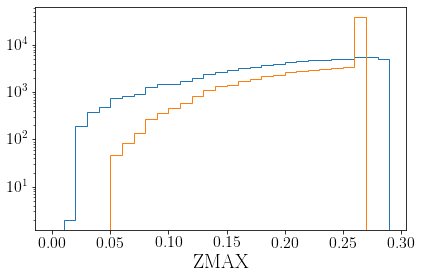

In [11]:
_ = pl.hist( gama_ddp['ZMAX'], bins=np.arange(0.0, 0.3, 0.01), histtype='step')
_ = pl.hist(gama_vmax['ZMAX'], bins=np.arange(0.0, 0.3, 0.01), histtype='step')

pl.xlabel('ZMAX')
pl.yscale('log')

In [12]:
np.unique(gama_vmax['ZMIN'].data)

array([0.04975])

Text(0, 0.5, '$z_{\\rm max}$')

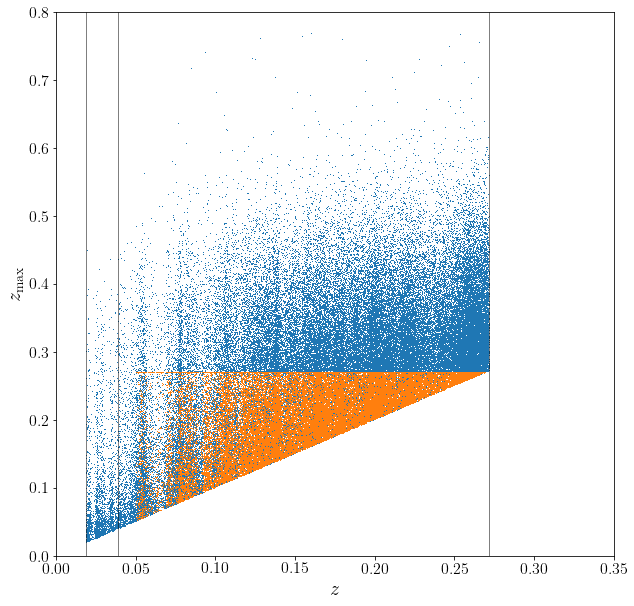

In [13]:
fig, ax = plt.subplots(1,1,figsize=(10,10))

ax.plot( gama_ddp['ZSURV'], gama_zmax['ZMAX'], marker=',', lw=0.0)
ax.plot(gama_vmax['ZSURV'], gama_vmax['ZMAX'], marker=',', lw=0.0)

ax.axvline(0.0188, c='k', lw=0.5) 
ax.axvline(0.0390, c='k', lw=0.5) 
ax.axvline(0.2715, c='k', lw=0.5) 

ax.set_xlim(0.0, 0.35)
ax.set_ylim(0.0, 0.80)

ax.set_xlabel(r'$z$')
ax.set_ylabel(r'$z_{\rm max}$')

Text(0, 0.5, '$z_{\\rm min}$')

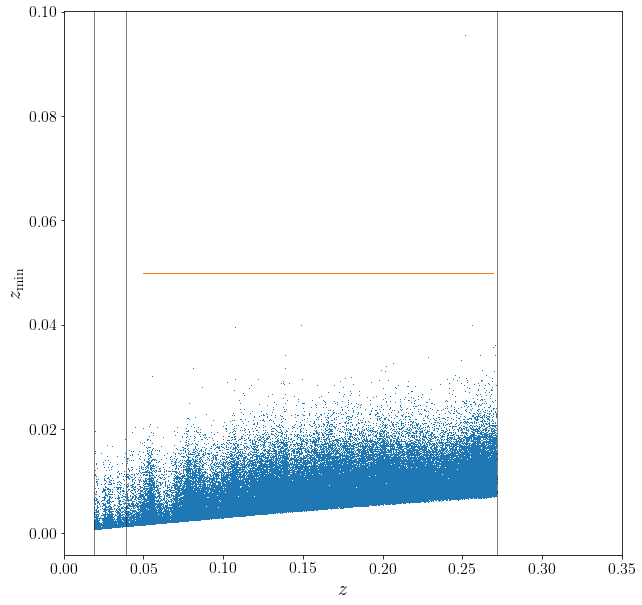

In [14]:
fig, ax = plt.subplots(1,1,figsize=(10,10))

ax.plot( gama_ddp['ZSURV'], gama_zmax['ZMIN'], marker=',', lw=0.0)
ax.plot(gama_vmax['ZSURV'], gama_vmax['ZMIN'], marker=',', lw=0.0)

ax.axvline(0.0188, c='k', lw=0.5) 
ax.axvline(0.0390, c='k', lw=0.5) 
ax.axvline(0.2715, c='k', lw=0.5) 

ax.set_xlim(0.0, 0.35)
# ax.set_ylim(0.0, 0.05)

ax.set_xlabel(r'$z$')
ax.set_ylabel(r'$z_{\rm min}$')

Text(0, 0.5, '$\\langle$ FILL FACTOR $\\rangle$')

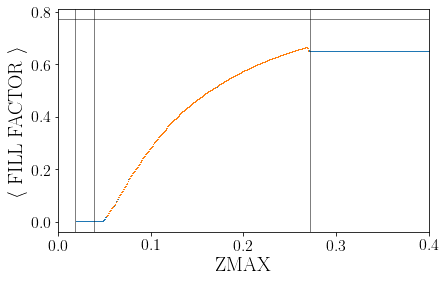

In [15]:
pl.plot(gama_ddp['ZMAX'],   gama_ddp['FILLFACTOR_VMAX'], marker=',', lw=0.0)
pl.plot(gama_vmax['ZMAX'], gama_vmax['FILLFACTOR_VMAX'], marker=',', lw=0.0)

pl.axvline(0.0188, c='k', lw=0.5) 
pl.axvline(0.0390, c='k', lw=0.5) 
pl.axvline(0.2715, c='k', lw=0.5) 

pl.axhline(0.7737,   c='k', lw=0.5)

pl.xlim(0.0, 0.4)

pl.xlabel('ZMAX')
pl.ylabel(r'$\langle$ FILL FACTOR $\rangle$')

Text(0.5, 0, 'RANDSEP [$h^{-1}$Mpc]')

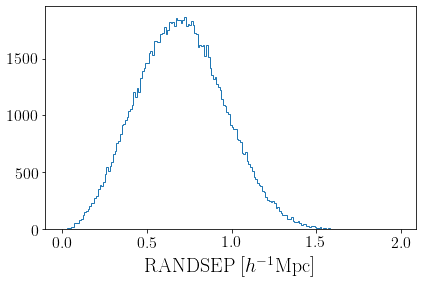

In [16]:
_ = pl.hist(gama_ddp['RANDSEP'], bins=np.arange(0.0, 2.0, 0.01), histtype='step')

pl.xlabel('RANDSEP [$h^{-1}$Mpc]')

(0.2, 1.03)

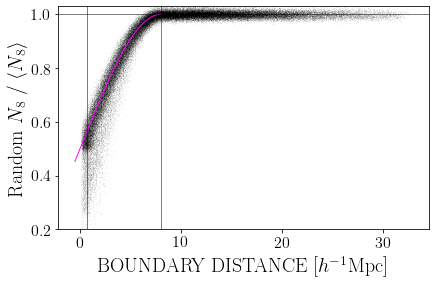

In [17]:
bds = np.arange(-0.5, 8., 0.01)

pl.scatter(gama_ddp['BOUND_DIST'], gama_ddp['FILLFACTOR'], marker='.', lw=0.0, s=2, alpha=0.05, c='k')
pl.plot(bds, fillfactor_expectation(bds, radius=8., nbar=1.), lw=1., c='magenta')

pl.xlabel('BOUNDARY DISTANCE [$h^{-1}$Mpc]')
pl.ylabel(r'Random $N_8 \ / \ \langle N_8 \rangle$')

pl.axhline(1.00, c='k', lw=0.5)
pl.axvline(8.00, c='k', lw=0.5)

pl.axvline(np.median(gama_ddp['RANDSEP']), c='k', lw=0.5)

pl.ylim(0.2, 1.03)

In [18]:
dat = Table.read('/cosma5/data/durham/dc-wils7/GAMA4/gama_gold_ddp_n8.fits')
dat

CATAID,OBJID,RA,DEC,R_PETRO,ZGAMA,NQ,SPECID,SURVEY_CLASS,UMAG_DRED_SDSS,GMAG_DRED_SDSS,RMAG_DRED_SDSS,IMAG_DRED_SDSS,ZMAG_DRED_SDSS,ZSURV,LUMDIST,DISTMOD,FIELD,IN_D8LUMFN,CONSERVATIVE,CARTESIAN_X,CARTESIAN_Y,CARTESIAN_Z,ROTCARTESIAN_X,ROTCARTESIAN_Y,ROTCARTESIAN_Z,GMR,DETMAG,REST_GMR_0P1,REST_GMR_0P1_WARN,REST_GMR_0P1_INDEX,KCORR_R0P1,KCORR_G0P1,KCORR_R0P0,KCORR_G0P0,REST_GMR_0P0,Q_COLOR_0P0,EQ_ALL_0P0,EQ_COLOR_0P0,MALL_0P0,MCOLOR_0P0,MQZERO_0P0,Z_THETA_QALL,Z_THETA_QZERO,Z_THETA_QCOLOR,DDPKCORR_R0P1,DDPKCORR_G0P1,DDPKCORR_R0P0,DDPKCORR_G0P0,DDPMALL_0P0,DELTA_DETMAG_FAINT,ZMAX,ZMAX_WARN,DELTA_DETMAG_BRIGHT,ZMIN,ZMIN_WARN,VMAX,DDP [3],DDPZLIMS [3],RANDSEP,RANDMATCH,BOUND_DIST,rFILLFACTOR,RAND_N8,FILLFACTOR,FILLFACTOR_VMAX,DDP1_N8,DDP2_N8,DDP3_N8,DDP1_DELTA8,DDP1_DELTA8_TIER
,,deg,deg,mag,,,,,mag,mag,mag,mag,mag,,Mpc,,,,,,,,,,,mag,mag,,,,,,,,mag,mag,,,mag,mag,mag,,,,,,,,mag,mag,,,mag,,,,,,,,,,,,,,,,,
int32,int64,float64,float64,float32,float32,int16,bytes33,int16,float32,float32,float32,float32,float32,float32,float64,float64,bytes3,int64,int64,float64,float64,float64,float64,float64,float64,float32,float32,float64,int32,int64,float64,float64,float64,float64,float64,float64,float32,float32,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float32,float64,float64,float32,float64,float64,float64,int64,int64,float64,int64,float64,float64,int64,float64,float64,int64,int64,int64,float64,int64
511539,587729972322697460,214.65138945,-1.26244731,19.22709,0.21299,4,G15_Y2_018_119,6,21.799599,20.321333,19.234184,18.83978,18.619904,0.21299,741.985077739468,39.35197585577133,G15,0,0,-503.07799319557733,-347.716625921488,-13.477005996895029,505.4752638051222,344.2002878348133,-14.03098022690156,1.0871487,19.22709,0.8086178701231479,0,5,0.018679356934780414,0.2972101531934684,0.2474002569437906,0.6383965560818761,0.6961523672437504,0.8,-0.20660031,-0.170392,-20.165684968725557,-20.201893270508165,-20.37228527714383,39.392775804296846,39.59937611271512,39.428984106079454,-0.03863336278907192,0.18086409396626874,0.1780915155731292,0.446039383679932,-20.096376227354895,0.5729084,0.2665731978582776,0.0,-7.227091,0.009106507174940848,0.0,7920297.825821957,0 .. 0,1 .. 0,0.18718172684719975,291772,7.9394809485149755,1.000624524320062,8589,1.0012073671231376,0.6615082230063117,14,0,0,0.06868497030372223,4
543782,588848898853306634,212.80316169,-0.85068564,18.942377,0.12733,4,G15_Y1_AS2_053,6,20.596775,19.494383,18.941788,18.558931,18.344885,0.12733,419.71052031641017,38.11474927610395,G15,0,0,-312.90145419811347,-201.67566528542397,-5.527506717228115,314.2938540355614,199.4889490774735,-5.871954492324867,0.55259514,18.942377,0.5131182450006609,0,3,-0.09132326600119958,-0.05184637245205577,0.11015824472168587,0.1822772556802188,0.4804761275912718,2.12,-0.12351011,-0.2699396,-19.1590203229735,-19.012590828950177,-19.282530430371533,38.101397413427605,38.22490752082564,37.95496791940428,-0.08444510672178197,-0.04225916109795453,0.13227977164041915,0.22291612861570875,-19.181141849892235,0.85762215,0.1913895729437075,0.0,-6.942377,0.005302184033912462,0.0,3077363.701860444,0 .. 0,1 .. 0,1.0269597530957804,310029,8.010121729845281,1.0,8519,0.9930475678800802,0.555224250737686,41,51,0,2.155436952756741,6
545289,588848898855928239,218.81656784,-0.85252611,19.100044,0.08221,4,G15_Y2_016_302,6,20.637308,19.540102,19.020603,18.838081,18.72613,0.08221,262.51613577965895,37.0957800142279,G15,2,0,-188.98234675775922,-152.03570193556519,-3.609221314893947,190.03380429897064,150.71426123865166,-3.8174874666304404,0.5194988,19.100044,0.5399353906781562,0,4,-0.11512715342608892,-0.13556371903100292,0.0909023727488997,0.10782449157590746,0.5025767062462344,2.12,-0.0797437,-0.17428519,-18.00689443824919,-17.91235294817122,-18.086638136488517,37.10693868873747,37.1866823869768,37.0123971986595,-0.11797420340339465,-0.1398714023379835,0.09875067495880646,0.12530388737567977,-18.0147427404591,0.699955,0.11342272155089571,0.0,-7.100044

Text(0, 0.5, '$g$FILLFACTOR')

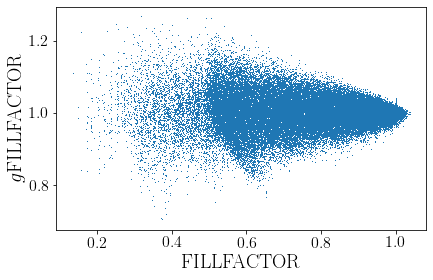

In [19]:
pl.plot(dat['rFILLFACTOR'], dat['FILLFACTOR'] / dat['rFILLFACTOR'], lw=0.0, marker=',')

pl.xlabel('FILLFACTOR')
pl.ylabel(r'$g$FILLFACTOR')

In [20]:
np.mean(dat['FILLFACTOR'] > 0.8)

0.7331584341053494

In [21]:
np.mean(dat['rFILLFACTOR'] > 0.8)

0.7333224021315844

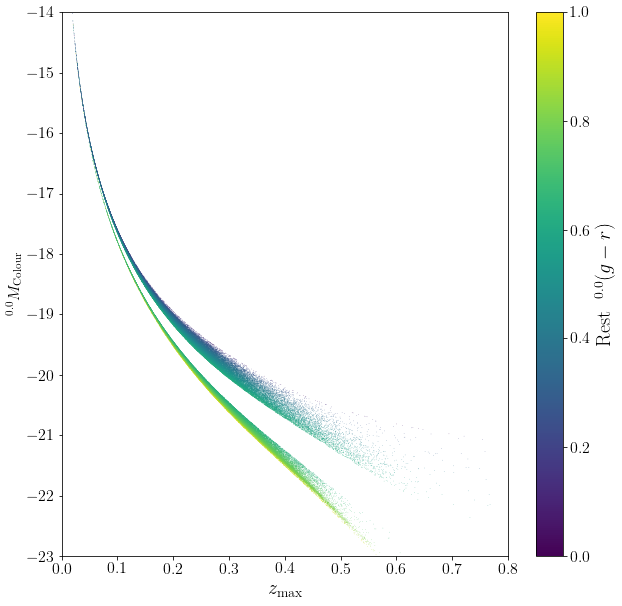

In [22]:
fig, ax = plt.subplots(1,1,figsize=(10,10))

sc = ax.scatter(gama_zmax['ZMAX'], gama_zmax['MCOLOR_0P0'], marker='.', lw=0.0, s=1, c=gama_zmax['REST_GMR_0P0'], vmin=0.0, vmax=1.0)

ax.set_xlim(0.0,   0.8)
ax.set_ylim(-23., -14.)

ax.set_xlabel(r'$z_{\rm max}$')
ax.set_ylabel(r'$^{0.0}M_{\rm Colour}$', fontsize=16)

plt.colorbar(sc, label='Rest \ $^{0.0}(g-r)$')

Text(0, 0.5, 'DEC [deg.]')

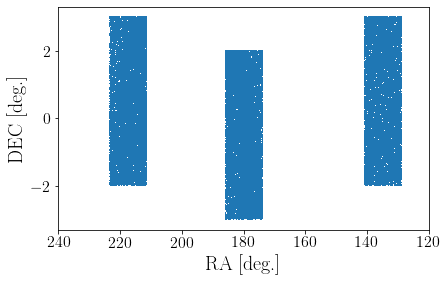

In [23]:
pl.plot(gama_zmax['RA'], gama_zmax['DEC'], marker=',', lw=0.0)

pl.xlim(240., 120.)

pl.xlabel('RA [deg.]')
pl.ylabel('DEC [deg.]')

In [24]:
fpath   = findfile(ftype='lumfn', dryrun=dryrun, version=version, survey=survey)
gama_lf = Table.read(fpath)
gama_lf

MEDIAN_M,MEAN_M,MID_M,IVMAXMEAN_M,PHI_N,PHI_N_ERROR,PHI_IVMAX,PHI_IVMAX_ERROR,N,V_ON_VMAX
float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
-22.9,-22.9,-22.9,-22.9,0.0,0.0,0.0,0.0,0.0,0.0
-22.819730991835396,-22.85261904735238,-22.7,-22.852619047352377,4.318070947645283e-06,1.6320774101432039e-06,6.656485134612901e-06,2.51591489599772e-06,7.0,0.6487013581975639
-22.702217608094877,-22.696279256593694,-22.5,-22.696279256593687,3.0843363911752027e-05,4.3619103553208596e-06,4.7546322390092156e-05,6.7240653965031875e-06,50.0,0.6487013581975639
-22.462979479370226,-22.480805515921833,-22.299999999999997,-22.480805515921848,5.305058592821348e-05,5.720591800706566e-06,8.177967451095846e-05,8.818529094191202e-06,86.0,0.6487013581975639
-22.284809886922197,-22.2911405882402,-22.099999999999998,-22.291140588240204,0.00010733490641289705,8.137038255934194e-06,0.00016546120191752065,1.2543581346188633e-05,174.0,0.6487013581975639
-22.096993763164484,-22.09763156459821,-21.9,-22.097631564598217,0.0002115854764346189,1.1424541871002429e-05,0.00032616777159603206,1.761140427198404e-05,343.0,0.6487013581975639
-21.885598483498715,-21.890410502954545,-21.7,-21.890410502954545,0.0003713541014974944,1.5135263256784742e-05,0.0005724577215767094,2.333163491261761e-05,602.0,0.6487013581975639
-21.688629510276517,-21.691961988929833,-21.5,-21.691961988929826,0.0006002118617226944,1.9241908884132697e-05,0.0009252514337111935,2.9662199162950602e-05,973.0,0.6487013581975639
-21.489444841163664,-21.49276283529265,-21.299999999999997,-21.492762835292645,0.000975884034167834,2.4535503419130063e-05,0.001504365640422516,3.782249429429697e-05,1582.0,0.6487013581975639


Text(0.5, 0, '$V/V_{Max}$')

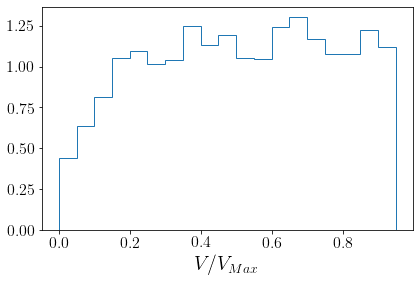

In [25]:
_ = pl.hist(gama_vmax['VZ'] / gama_vmax['VMAX'], bins=np.arange(0.0, 1.0, 0.05), histtype='step', density=True)

pl.xlabel('$V/V_{Max}$')

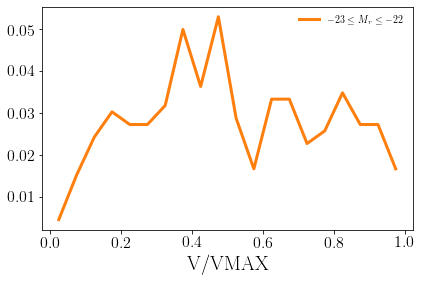

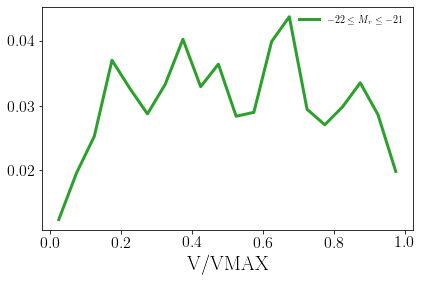

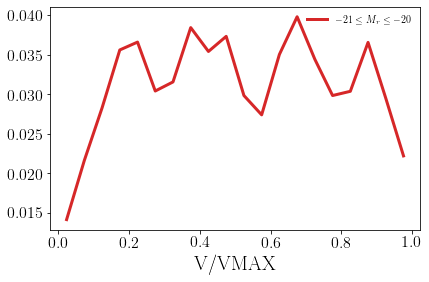

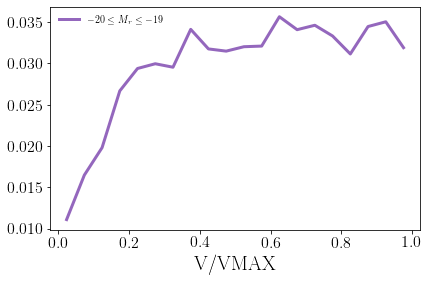

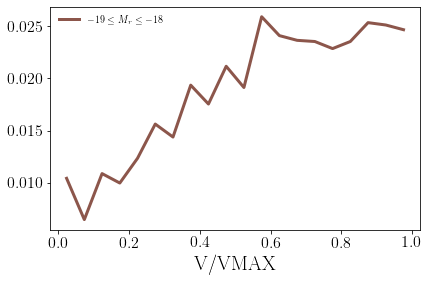

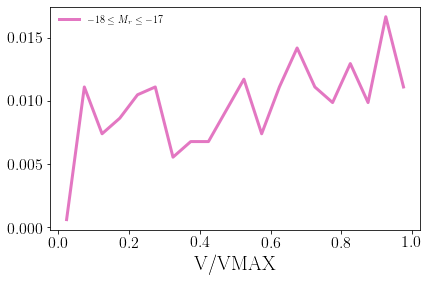

In [26]:
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
idx    = np.digitize(gama_vmax['MCOLOR_0P0'], np.arange(-23., -17., 1.))

for count, jj in enumerate(np.unique(idx)):
    sample = gama_vmax[(idx == jj) & (gama_vmax['MCOLOR_0P0'].data >= -23.) & (gama_vmax['MCOLOR_0P0'].data <= -17.)]
    nsample = len(sample)

    if nsample == 0:
        continue
    
    dbin = 0.05
    bins = np.arange(0., 1.001, dbin)
    
    ns, _ = np.histogram(sample['VZ'] / sample['VMAX'], bins=bins)
    
    centres = bins[:-1] + dbin/2.
    
    plt.plot(centres, ns / nsample, color=colors[count], label=r'${:.0f} \leq M_r \leq {:.0f}$'.format(sample['MCOLOR_0P0'].min(),\
                                                                                                       sample['MCOLOR_0P0'].max()))

    plt.xlabel('V/VMAX')
    plt.legend(frameon=False)
    
    pl.show()

In [27]:
spurious = gama_zmax[gama_zmax['REST_GMR_0P1_WARN'] > 0.0]
spurious.sort('GMR')
spurious

CATAID,OBJID,RA,DEC,R_PETRO,ZGAMA,NQ,SPECID,SURVEY_CLASS,UMAG_DRED_SDSS,GMAG_DRED_SDSS,RMAG_DRED_SDSS,IMAG_DRED_SDSS,ZMAG_DRED_SDSS,ZSURV,LUMDIST,DISTMOD,FIELD,IN_D8LUMFN,CONSERVATIVE,CARTESIAN_X,CARTESIAN_Y,CARTESIAN_Z,ROTCARTESIAN_X,ROTCARTESIAN_Y,ROTCARTESIAN_Z,GMR,DETMAG,REST_GMR_0P1,REST_GMR_0P1_WARN,REST_GMR_0P1_INDEX,KCORR_R0P1,KCORR_G0P1,KCORR_R0P0,KCORR_G0P0,REST_GMR_0P0,Q_COLOR_0P0,EQ_ALL_0P0,EQ_COLOR_0P0,MALL_0P0,MCOLOR_0P0,MQZERO_0P0,Z_THETA_QALL,Z_THETA_QZERO,Z_THETA_QCOLOR,DDPKCORR_R0P1,DDPKCORR_G0P1,DDPKCORR_R0P0,DDPKCORR_G0P0,DDPMALL_0P0,DELTA_DETMAG_FAINT,ZMAX,ZMAX_WARN,DELTA_DETMAG_BRIGHT,ZMIN,ZMIN_WARN,VMAX
,,deg,deg,mag,,,,,mag,mag,mag,mag,mag,,Mpc,,,,,,,,,,,mag,mag,,,,,,,,mag,mag,,,mag,mag,mag,,,,,,,,mag,mag,,,mag,,,
int32,int64,float64,float64,float32,float32,int16,bytes33,int16,float32,float32,float32,float32,float32,float32,float64,float64,bytes3,int64,int64,float64,float64,float64,float64,float64,float64,float32,float32,float64,int32,int64,float64,float64,float64,float64,float64,float64,float32,float32,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float32,float64,float64,float32,float64,float64,float64
84548,587722983886881328,178.41186365,0.53094523,19.129574,0.14889,4,G12_Y2_042_085,6,28.227417,29.744629,18.847836,29.051346,23.953873,0.14889,497.94976691080626,38.48592766707365,G12,0,0,-433.23304428929094,12.01152005870378,4.016316713129331,433.142899165352,-15.032094939512701,3.5416242870717847,10.896793,19.129574,-99.0,2,1,-0.13889772296610337,-0.0765818069362224,0.022382996340270717,0.051262804552402355,10.867913557266384,0.8,-0.1444233,-0.11911201,-19.234313535404127,-19.25962483407251,-19.37873684139244,38.36388735742561,38.50831066341392,38.389198656093996,-0.07153357457968779,0.01002668527675725,0.14519130378251333,0.27520197499042054,-19.35712184284637,0.6704254,0.2045565206929093,0.0,-7.129574,0.0059108656363813005,0.0,3725782.2344622263


Text(0.5, 0, 'ZSURV')

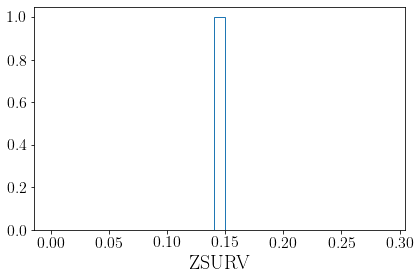

In [28]:
_ = pl.hist(spurious['ZSURV'], bins=np.arange(0.0, 0.3, 0.01), histtype='step')
pl.xlabel('ZSURV')

Text(0.5, 0, 'GMR')

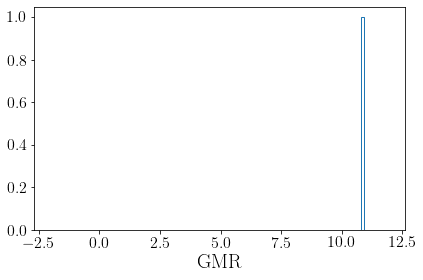

In [29]:
_ = pl.hist(spurious['GMR'], bins=np.arange(-2., 12., 0.1), histtype='step')
pl.xlabel('GMR')

Text(0.5, 0, 'MCOLOR_0P0')

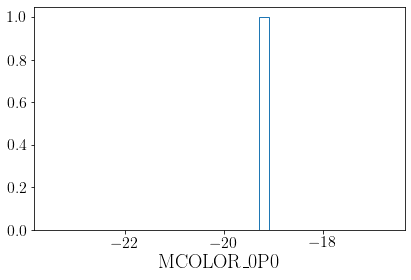

In [30]:
_ = pl.hist(spurious['MCOLOR_0P0'], bins=np.arange(-23.5, -16.5, 0.2), histtype='step')
pl.xlabel('MCOLOR_0P0')

In [31]:
gama_zmax.sort('ZMAX')
gama_zmax

CATAID,OBJID,RA,DEC,R_PETRO,ZGAMA,NQ,SPECID,SURVEY_CLASS,UMAG_DRED_SDSS,GMAG_DRED_SDSS,RMAG_DRED_SDSS,IMAG_DRED_SDSS,ZMAG_DRED_SDSS,ZSURV,LUMDIST,DISTMOD,FIELD,IN_D8LUMFN,CONSERVATIVE,CARTESIAN_X,CARTESIAN_Y,CARTESIAN_Z,ROTCARTESIAN_X,ROTCARTESIAN_Y,ROTCARTESIAN_Z,GMR,DETMAG,REST_GMR_0P1,REST_GMR_0P1_WARN,REST_GMR_0P1_INDEX,KCORR_R0P1,KCORR_G0P1,KCORR_R0P0,KCORR_G0P0,REST_GMR_0P0,Q_COLOR_0P0,EQ_ALL_0P0,EQ_COLOR_0P0,MALL_0P0,MCOLOR_0P0,MQZERO_0P0,Z_THETA_QALL,Z_THETA_QZERO,Z_THETA_QCOLOR,DDPKCORR_R0P1,DDPKCORR_G0P1,DDPKCORR_R0P0,DDPKCORR_G0P0,DDPMALL_0P0,DELTA_DETMAG_FAINT,ZMAX,ZMAX_WARN,DELTA_DETMAG_BRIGHT,ZMIN,ZMIN_WARN,VMAX
,,deg,deg,mag,,,,,mag,mag,mag,mag,mag,,Mpc,,,,,,,,,,,mag,mag,,,,,,,,mag,mag,,,mag,mag,mag,,,,,,,,mag,mag,,,mag,,,
int32,int64,float64,float64,float32,float32,int16,bytes33,int16,float32,float32,float32,float32,float32,float32,float64,float64,bytes3,int64,int64,float64,float64,float64,float64,float64,float64,float32,float32,float64,int32,int64,float64,float64,float64,float64,float64,float64,float32,float32,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float32,float64,float64,float32,float64,float64,float64
78982,587722983367966779,219.43813423,0.07880795,17.586954,0.21069,5,345782141184927744,6,18.2645,17.868378,17.567848,17.333746,17.30042,0.21069,732.9414969320795,39.32534655415001,G15,0,0,-467.5500709858969,-384.5713910261141,0.8326904983070628,470.2208914811346,381.3018876752127,0.3173612299916374,0.30052948,17.586954,0.13170774822191056,0,1,-0.19619757487891137,-0.027375843120353183,-0.034880126871333295,0.10071625950984983,0.16493309359928562,2.12,-0.2043693,-0.44666278,-21.499143003893057,-21.256849526834646,-21.703512310457388,39.08609712071434,39.29046642727867,38.84380364365593,-0.03977202648651637,0.1744464956821029,0.17695285187568474,0.4396217853957662,-21.710975982640075,2.2130451,-99.0,1.0,-5.586954,0.014802823191502936,0.0,--
3885866,588010930833720024,135.89216253,-1.59989053,19.79879,0.01913,3,G09_Y4_201_099,5,21.111166,19.830143,19.624992,19.463436,19.159803,0.01913,58.23656723127899,33.82597883732409,G9,0,0,-41.014753323858095,39.75694158101026,-1.595428630441649,40.734764295540565,-40.041964586359256,-1.6400720896142431,0.2051506,19.79879,0.21310850995874878,0,2,-0.13476045403622627,-0.14271835974692815,0.029341393698033152,0.00413602535927568,0.23035597258680435,2.12,-0.018556101,-0.0405556,-14.037974151747107,-14.015974652917862,-14.056530252994776,33.83676412977445,33.85532023102212,33.814764630945206,-0.18808820319905228,-0.24293694375240532,0.028636675163148828,0.022238345961257955,-14.037269433212224,0.001209259,0.01914057713140389,0.0,-7.79879,0.0005323764772190999,0.0,3415.9585541320084
8480,588848900987486613,182.47796837,0.67909776,19.789885,0.01915,4,G12_Y1_ND5_288,5,20.860147,19.998114,19.72312,19.643885,19.739418,0.01915,58.298373693126614,33.82828219867051,G12,0,0,-57.14543292081807,-2.4730081465030795,0.6779814634205791,57.16199627827204,2.074481777241864,0.6153362526587615,0.2749939,19.789885,0.29328450892908514,0,2,-0.14091228167316655,-0.15920289411787455,0.025932071473279666,0.006131474570549633,0.29479449338710506,2.12,-0.0185755,-0.040597998,-14.045754202186147,-14.023731705277244,-14.064329702883045,33.83563876944689,33.854214270143785,33.813616272537985,-0.18806031637460274,-0.24291135687966586,0.02866456198759837,0.022263932833997413,-14.048486692700466,0.01011467,0.019238826673532626,0.0,-7.7898846,0.0005343133974404233,0.0,3468.6376736824286
402403,587728308031390135,174.91458961,1.95910608,19.758127,0.01985,3,G12_Y1_AX2_319,5,21.195854,20.027178,19.75573,19.693892,19.629356,0.01985,60.462836372194296,33.90744258254336,G12,0,0,-59.01812145764674,5.252079477428639,2.0267626874846387,58.98225052833568,-5.663476012324586,1.9621234131980374,0.27144814,19.758127,0.28982214231761483,0,2,-0.13984703359337133,-0.15822104053500846,0.0268788856165742,0.006315277877057185,0.2920117431154936,2.12,-0.019254502,-0.042082,-14.1569397

In [32]:
spurious = gama_zmax[gama_zmax['ZMAX_WARN'] > 0.0]
spurious.sort('R_PETRO')
spurious

CATAID,OBJID,RA,DEC,R_PETRO,ZGAMA,NQ,SPECID,SURVEY_CLASS,UMAG_DRED_SDSS,GMAG_DRED_SDSS,RMAG_DRED_SDSS,IMAG_DRED_SDSS,ZMAG_DRED_SDSS,ZSURV,LUMDIST,DISTMOD,FIELD,IN_D8LUMFN,CONSERVATIVE,CARTESIAN_X,CARTESIAN_Y,CARTESIAN_Z,ROTCARTESIAN_X,ROTCARTESIAN_Y,ROTCARTESIAN_Z,GMR,DETMAG,REST_GMR_0P1,REST_GMR_0P1_WARN,REST_GMR_0P1_INDEX,KCORR_R0P1,KCORR_G0P1,KCORR_R0P0,KCORR_G0P0,REST_GMR_0P0,Q_COLOR_0P0,EQ_ALL_0P0,EQ_COLOR_0P0,MALL_0P0,MCOLOR_0P0,MQZERO_0P0,Z_THETA_QALL,Z_THETA_QZERO,Z_THETA_QCOLOR,DDPKCORR_R0P1,DDPKCORR_G0P1,DDPKCORR_R0P0,DDPKCORR_G0P0,DDPMALL_0P0,DELTA_DETMAG_FAINT,ZMAX,ZMAX_WARN,DELTA_DETMAG_BRIGHT,ZMIN,ZMIN_WARN,VMAX
,,deg,deg,mag,,,,,mag,mag,mag,mag,mag,,Mpc,,,,,,,,,,,mag,mag,,,,,,,,mag,mag,,,mag,mag,mag,,,,,,,,mag,mag,,,mag,,,
int32,int64,float64,float64,float32,float32,int16,bytes33,int16,float32,float32,float32,float32,float32,float32,float64,float64,bytes3,int64,int64,float64,float64,float64,float64,float64,float64,float32,float32,float64,int32,int64,float64,float64,float64,float64,float64,float64,float32,float32,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float32,float64,float64,float32,float64,float64,float64
78982,587722983367966779,219.43813423,0.07880795,17.586954,0.21069,5,345782141184927744,6,18.2645,17.868378,17.567848,17.333746,17.30042,0.21069,732.9414969320795,39.32534655415001,G15,0,0,-467.5500709858969,-384.5713910261141,0.8326904983070628,470.2208914811346,381.3018876752127,0.3173612299916374,0.30052948,17.586954,0.13170774822191056,0,1,-0.19619757487891137,-0.027375843120353183,-0.034880126871333295,0.10071625950984983,0.16493309359928562,2.12,-0.2043693,-0.44666278,-21.499143003893057,-21.256849526834646,-21.703512310457388,39.08609712071434,39.29046642727867,38.84380364365593,-0.03977202648651637,0.1744464956821029,0.17695285187568474,0.4396217853957662,-21.710975982640075,2.2130451,-99.0,1.0,-5.586954,0.014802823191502936,0.0,--


In [21]:
spurious = gama_zmax[gama_zmax['ZMIN_WARN'] > 0.0]
spurious.sort('R_PETRO')
spurious

CATAID,OBJID,RA,DEC,R_PETRO,ZGAMA,NQ,SPECID,SURVEY_CLASS,UMAG_DRED_SDSS,GMAG_DRED_SDSS,RMAG_DRED_SDSS,IMAG_DRED_SDSS,ZMAG_DRED_SDSS,ZSURV,LUMDIST,DISTMOD,FIELD,IN_D8LUMFN,CONSERVATIVE,CARTESIAN_X,CARTESIAN_Y,CARTESIAN_Z,ROTCARTESIAN_X,ROTCARTESIAN_Y,ROTCARTESIAN_Z,GMR,DETMAG,REST_GMR_0P1,REST_GMR_0P1_WARN,REST_GMR_0P1_INDEX,KCORR_R0P1,KCORR_G0P1,KCORR_R0P0,KCORR_G0P0,REST_GMR_0P0,Q_COLOR_0P0,EQ_ALL_0P0,EQ_COLOR_0P0,MALL_0P0,MCOLOR_0P0,MQZERO_0P0,Z_THETA_QALL,Z_THETA_QZERO,Z_THETA_QCOLOR,DDPKCORR_R0P1,DDPKCORR_G0P1,DDPKCORR_R0P0,DDPKCORR_G0P0,DDPMALL_0P0,DELTA_DETMAG_FAINT,ZMAX,ZMAX_WARN,DELTA_DETMAG_BRIGHT,ZMIN,ZMIN_WARN,VMAX
,,deg,deg,mag,,,,,mag,mag,mag,mag,mag,,Mpc,,,,,,,,,,,mag,mag,,,,,,,,mag,mag,,,mag,mag,mag,,,,,,,,mag,mag,,,mag,,,
int32,int64,float64,float64,float32,float32,int16,bytes33,int16,float32,float32,float32,float32,float32,float32,float64,float64,bytes3,int64,int64,float64,float64,float64,float64,float64,float64,float32,float32,float64,int32,int64,float64,float64,float64,float64,float64,float64,float32,float32,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float32,float64,float64,float32,float64,float64,float64


# Done.